<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/DB_Scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DB Scan Clustering**

**Dataset**- https://archive.ics.uci.edu/dataset/292/wholesale+customers
Wholesale Customers-The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install pandas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [6]:
dataset_file_path = '/content/drive/MyDrive/DM/Customers.csv'

In [8]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

In [12]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
# Drop non-numeric columns (assuming clustering on numeric features)
numeric_data = data.drop(['Channel', 'Region'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
data['Cluster'] = labels

# Display the number of points in each cluster
print(data['Cluster'].value_counts())


 0    261
-1    174
 1      5
Name: Cluster, dtype: int64


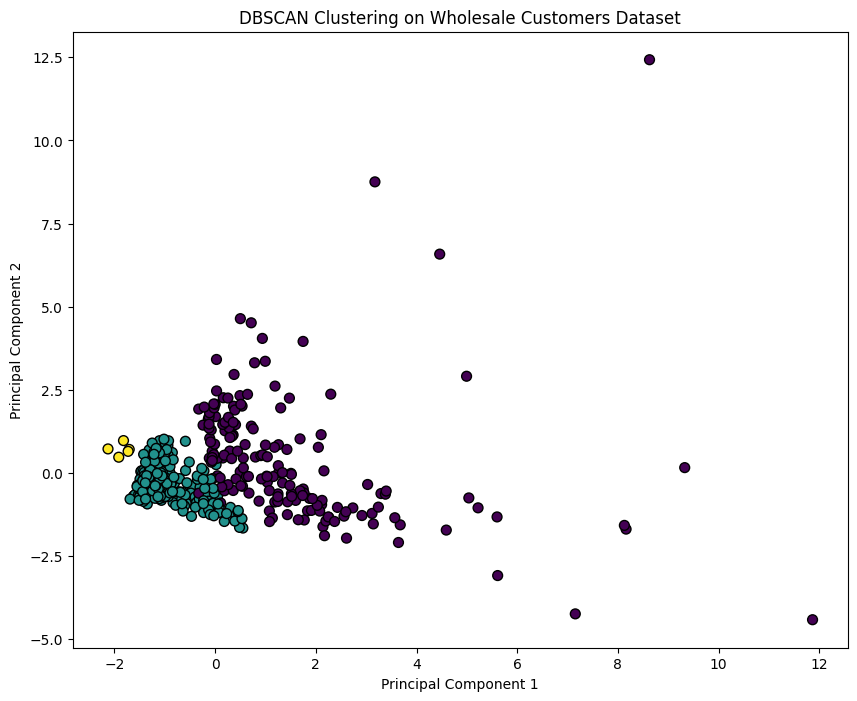

In [15]:

# Visualize the clusters using PCA (assuming 2D visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('DBSCAN Clustering on Wholesale Customers Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()